# Data Science Foundations: Advanced Visualization and Evaluation Techniques

**Course:** Foundations of Data Science  
**Instructor:** [Your Instructor's Name]  
**Student:** [Your Name]  
**Date:** [Current Date]

---

## Table of Contents

1. [Pie Chart](#1-pie-chart)
   - [Basic Pie Chart](#11-basic-pie-chart)
   - [Advanced Pie Chart](#12-advanced-pie-chart)
2. [Heatmap](#2-heatmap)
   - [Basic Heatmap](#21-basic-heatmap)
   - [Advanced Heatmap with Clustering](#22-advanced-heatmap-with-clustering)
   - [Statistically Significant Heatmap](#23-statistically-significant-heatmap)
3. [R² Error and Mean Squared Error (MSE)](#3-r²-error-and-mean-squared-error-mse)
   - [Basic R² and MSE](#31-basic-r²-and-mse)
   - [Adjusted R²](#32-adjusted-r²)
   - [Residual Analysis](#33-residual-analysis)
   - [Variance Inflation Factor (VIF)](#34-variance-inflation-factor-vif)
4. [ROC and AUC Curve](#4-roc-and-auc-curve)
   - [Basic ROC and AUC](#41-basic-roc-and-auc)
   - [Handling Imbalanced Datasets](#42-handling-imbalanced-datasets)
   - [Multiclass ROC Curves](#43-multiclass-roc-curves)
5. [Confusion Matrix](#5-confusion-matrix)
   - [Basic Confusion Matrix](#51-basic-confusion-matrix)
   - [Normalized Confusion Matrix](#52-normalized-confusion-matrix)
   - [Classification Report](#53-classification-report)
   - [Cohen's Kappa](#54-cohens-kappa)
6. [Cross-Validation and Model Selection](#6-cross-validation-and-model-selection)
   - [K-Fold Cross-Validation](#61-k-fold-cross-validation)
   - [Grid Search for Hyperparameter Tuning](#62-grid-search-for-hyperparameter-tuning)

---

## 1. Pie Chart

### 1.1 Basic Pie Chart

#### **Explanation**

A pie chart is a circular graph divided into sectors, each representing a proportion of the whole. It's best used for datasets with a limited number of categories.

#### **Python Implementation**

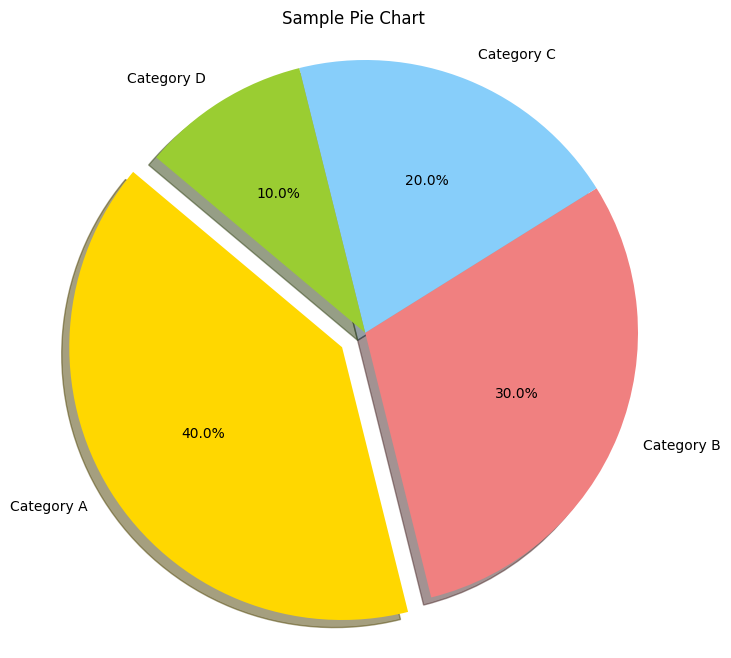

In [1]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [40, 30, 20, 10]
colors = ['gold', 'lightcoral', 'lightskyblue', 'yellowgreen']
explode = (0.1, 0, 0, 0)  # Explode the first slice

# Create pie chart
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Sample Pie Chart')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 1.2 Advanced Pie Chart

#### **Explanation**

Advanced pie charts incorporate interactive features, emphasize specific slices, and adhere to best practices to enhance readability and interpretability.

#### **Interactive Pie Chart with Plotly**


In [2]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Values': [45, 25, 15, 10, 5]
}
df = pd.DataFrame(data)

# Create interactive pie chart
fig = px.pie(df, values='Values', names='Category',
             title='Interactive Pie Chart',
             hover_data=['Values'],
             labels={'Values':'Value'},
             template='seaborn')

# Customize hover template
fig.update_traces(textposition='inside', textinfo='percent+label',
                  hovertemplate='<b>%{label}</b><br>Value: %{value}')

fig.show()

#### **Emphasizing Slices**

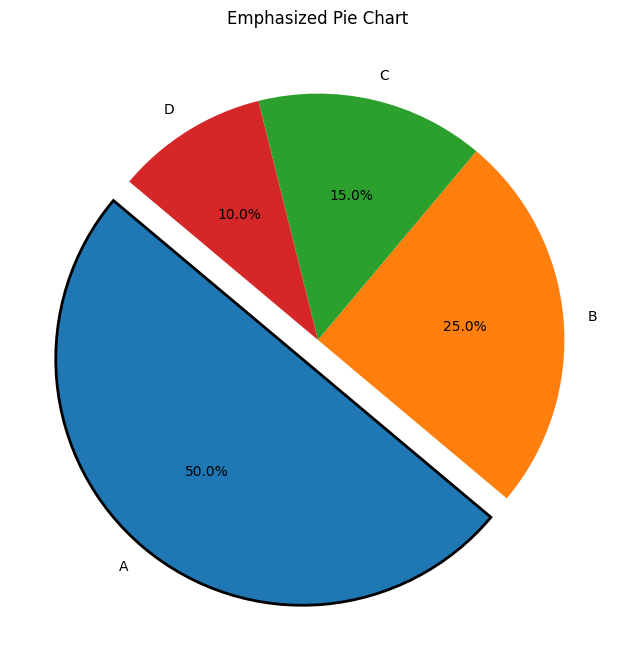

In [3]:
import matplotlib.pyplot as plt

# Data
labels = ['A', 'B', 'C', 'D']
sizes = [50, 25, 15, 10]
explode = (0.1, 0, 0, 0)  # Explode the first slice

# Create pie chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels,
                                  autopct='%1.1f%%', startangle=140,
                                  textprops=dict(color="black"))

# Emphasize the largest slice
plt.setp(wedges[0], edgecolor='black', linewidth=2)

plt.title('Emphasized Pie Chart')
plt.show()


---

## 2. Heatmap

### 2.1 Basic Heatmap

#### **Explanation**

A heatmap visualizes data matrices, highlighting the magnitude of values through color variations. It's commonly used for correlation matrices.

#### **Python Implementation**

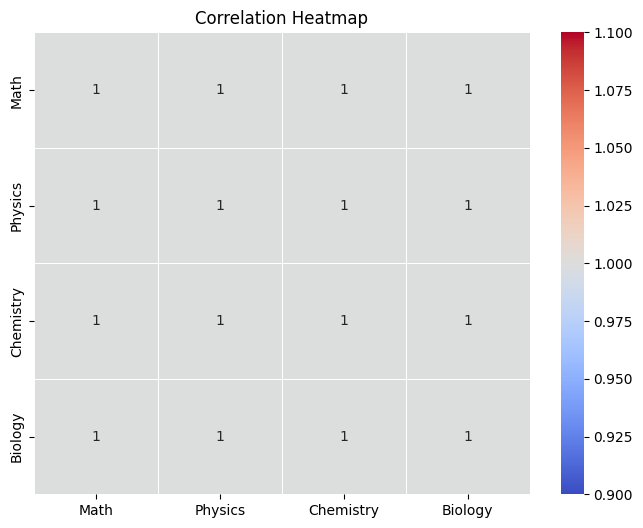

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Math': [90, 80, 70, 60, 85],
    'Physics': [85, 75, 65, 55, 80],
    'Chemistry': [88, 78, 68, 58, 83],
    'Biology': [92, 82, 72, 62, 87]
}
df = pd.DataFrame(data)

# Compute correlation matrix
corr = df.corr()

# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 2.2 Advanced Heatmap with Clustering

#### **Explanation**

Clustered heatmaps incorporate hierarchical clustering to group similar rows or columns, revealing hidden patterns.

#### **Python Implementation**

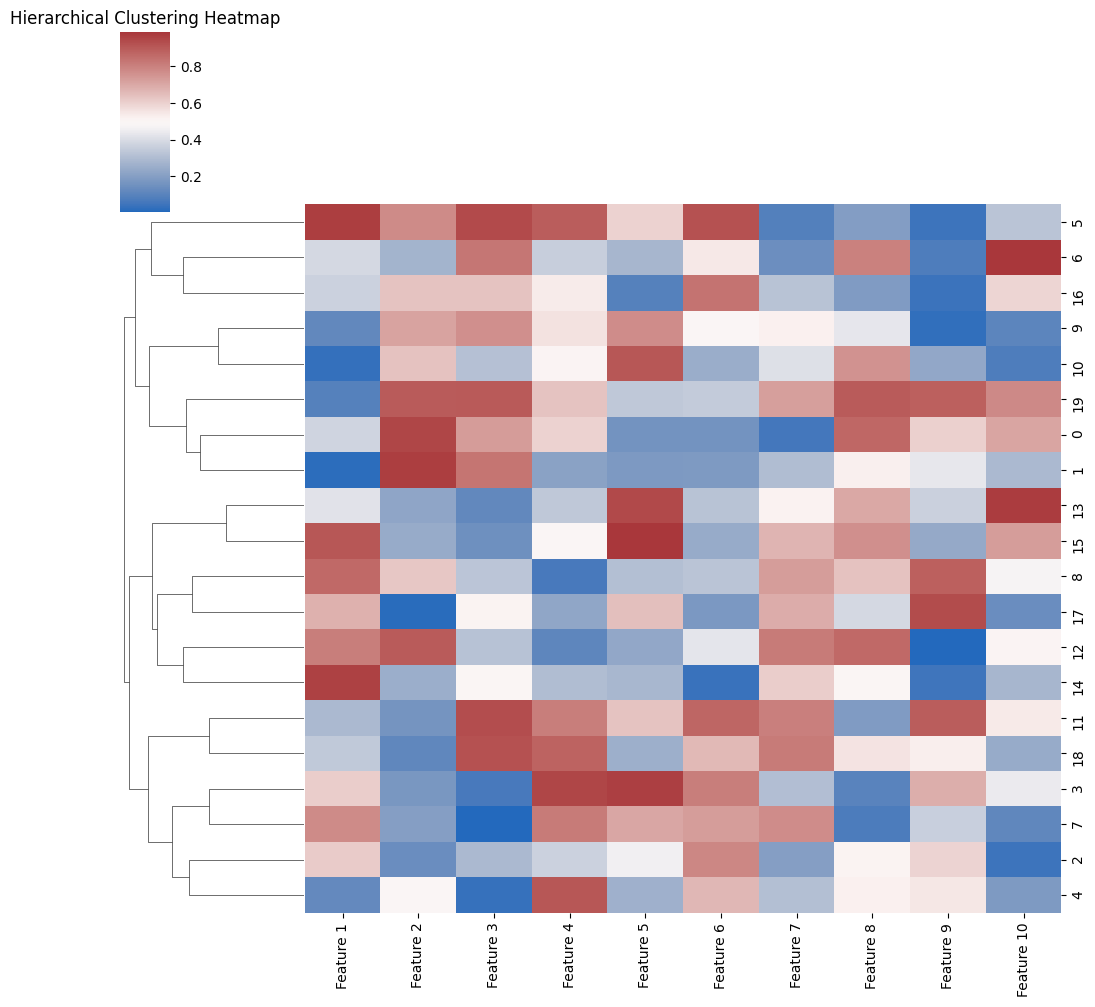

In [5]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

# Generate synthetic data
np.random.seed(42)
data = np.random.rand(20, 10)
df = pd.DataFrame(data, columns=[f'Feature {i}' for i in range(1, 11)])

# Perform hierarchical clustering
row_clusters = linkage(df.values, method='average', metric='euclidean')

# Create clustered heatmap
sns.clustermap(df, row_linkage=row_clusters, col_cluster=False,
               cmap='vlag', figsize=(10, 10))

plt.title('Hierarchical Clustering Heatmap')
plt.show()

A clustered heatmap with dendrograms illustrating hierarchical clustering.

### 2.3 Statistically Significant Heatmap

#### **Explanation**

This heatmap highlights only statistically significant correlations, enhancing interpretability by filtering out non-significant relationships.

#### **Python Implementation**

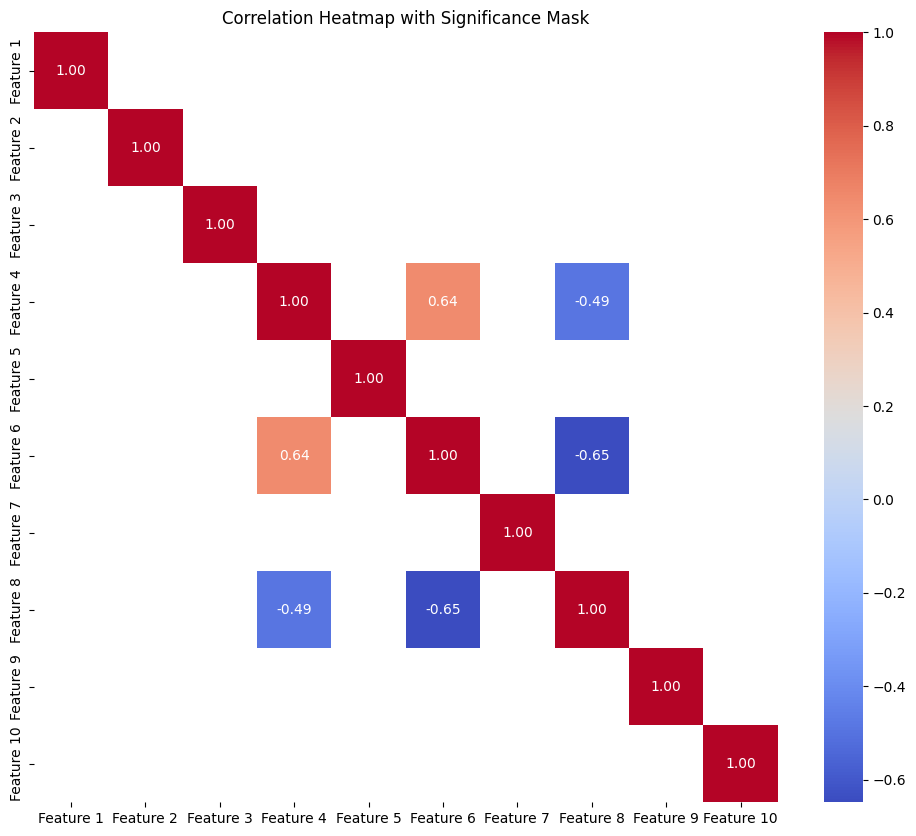

In [6]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined from previous cells

# Compute correlation matrix
corr = df.corr()

# Compute p-values
pvals = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(len(df.columns))

# Create a mask for non-significant correlations
significance_level = 0.05
mask_significant = pvals < significance_level

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=~mask_significant, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Significance Mask')
plt.show()

---

## 3. R² Error and Mean Squared Error (MSE)

### 3.1 Basic R² and MSE

#### **Explanation**

- **R² (Coefficient of Determination)**: Indicates the proportion of the variance in the dependent variable predictable from the independent variables.
- **MSE (Mean Squared Error)**: Measures the average squared difference between actual and predicted values.

#### **Python Implementation**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4, 5])

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Calculate R²
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.2f}")

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

R² Score: 0.60
Mean Squared Error: 0.48


### 3.2 Adjusted R²

#### **Explanation**

Adjusted R² modifies the R² value by accounting for the number of predictors, providing a more accurate measure in models with multiple variables.

#### **Python Implementation**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Sample data with multiple predictors
np.random.seed(0)
X = np.random.rand(100, 5)
coefficients = np.array([1.5, -2.0, 1.0, 0.0, 0.5])
y = X @ coefficients + np.random.randn(100)

# Fit model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Compute R² and Adjusted R²
r2 = r2_score(y, y_pred)
n = X.shape[0]
p = X.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adjusted_r2:.4f}")

R² Score: 0.4484
Adjusted R² Score: 0.4191


### 3.3 Residual Analysis

#### **Explanation**

Residual analysis assesses the discrepancies between observed and predicted values to validate regression assumptions such as homoscedasticity and normality.

#### **Python Implementation**

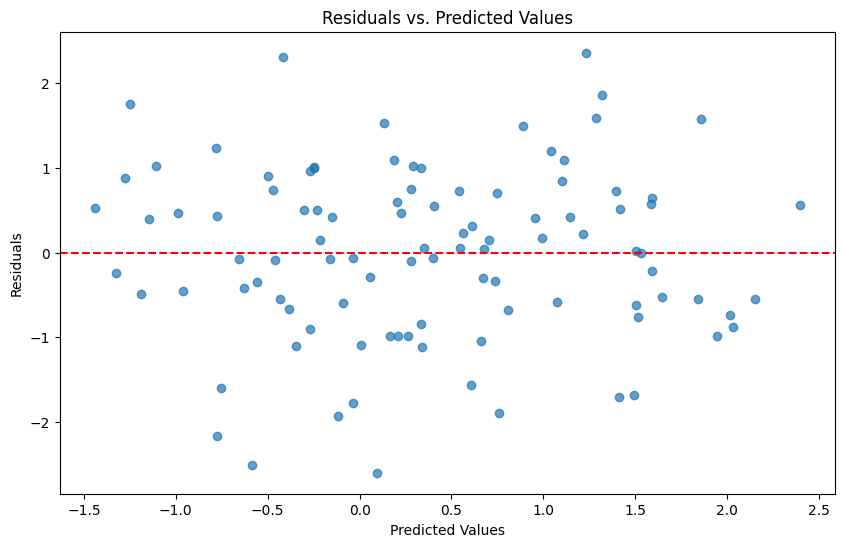

In [9]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y - y_pred

# Plot residuals vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

**Interpretation:**

A random scatter of residuals around zero suggests homoscedasticity and that the model's assumptions are met. Patterns may indicate issues like heteroscedasticity or model misspecification.

### 3.4 Variance Inflation Factor (VIF)

#### **Explanation**

VIF measures multicollinearity among independent variables. High VIF values indicate redundant predictors.

#### **Python Implementation**

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = [f'X{i}' for i in range(X.shape[1])]
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

print(vif_data)

  Feature       VIF
0      X0  3.467033
1      X1  3.665749
2      X2  3.542852
3      X3  3.657167
4      X4  3.340318


**Interpretation:**

VIF values above 5 indicate potential multicollinearity. In this case, all VIFs are close to 1, suggesting no multicollinearity issues.

---

## 4. ROC and AUC Curve

### 4.1 Basic ROC and AUC

#### **Explanation**

- **ROC Curve**: Plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
- **AUC (Area Under the Curve)**: Quantifies the overall ability of the model to discriminate between classes.

#### **Python Implementation**

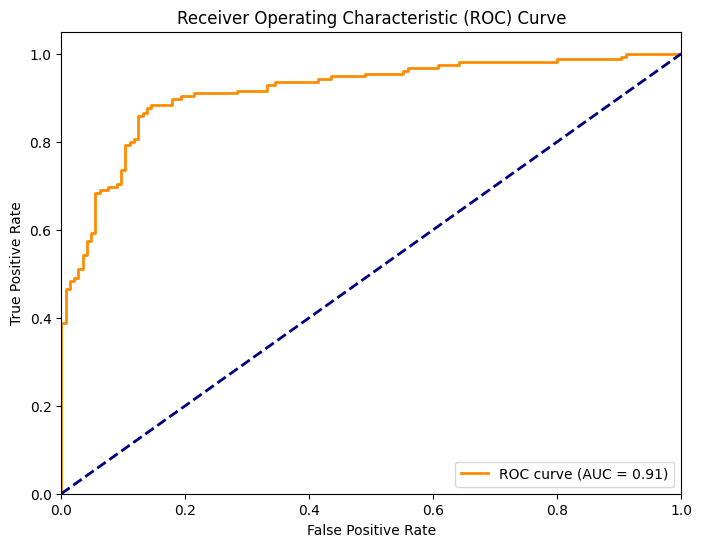

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20,
                           n_classes=2, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### 4.2 Handling Imbalanced Datasets

#### **Explanation**

In imbalanced datasets, ROC curves can be misleading. Precision-Recall curves offer better insights in such scenarios.

#### **Precision-Recall Curve**

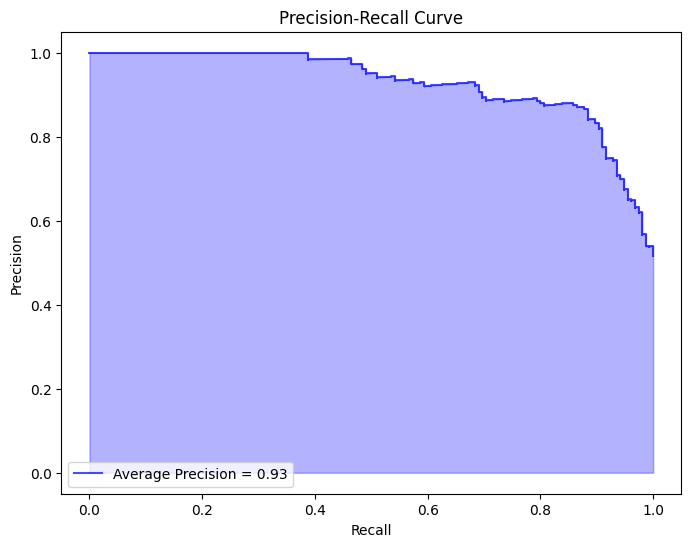

In [12]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8,6))
plt.step(recall, precision, where='post', color='b', alpha=0.7,
         label=f'Average Precision = {average_precision:.2f}')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

### 4.3 Multiclass ROC Curves

#### **Explanation**

Extending ROC analysis to multiclass classification using the One-vs-Rest (OvR) strategy.

#### **Python Implementation**

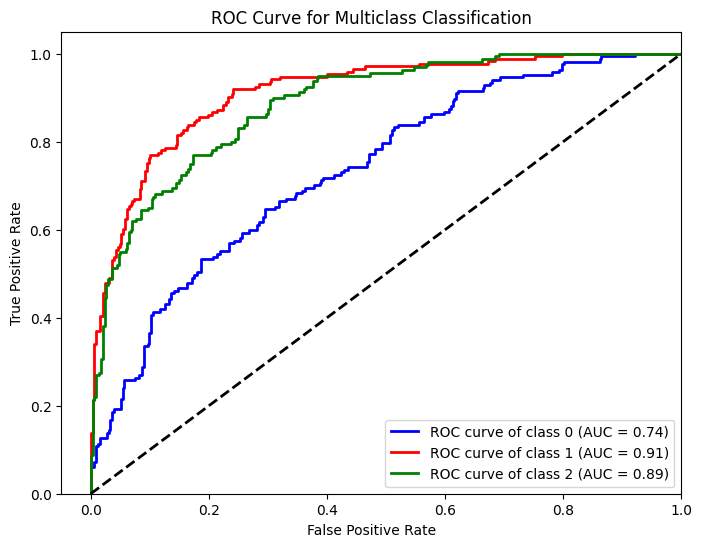

In [13]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Generate multiclass data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3,
                           n_informative=10, n_redundant=5, random_state=42)

# Binarize the output
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.5, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(max_iter=1000))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'red', 'green']

plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve of class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

---

## 5. Confusion Matrix

### 5.1 Basic Confusion Matrix

#### **Explanation**

A confusion matrix displays the performance of a classification model by showing the true vs. predicted classes.

#### **Python Implementation**

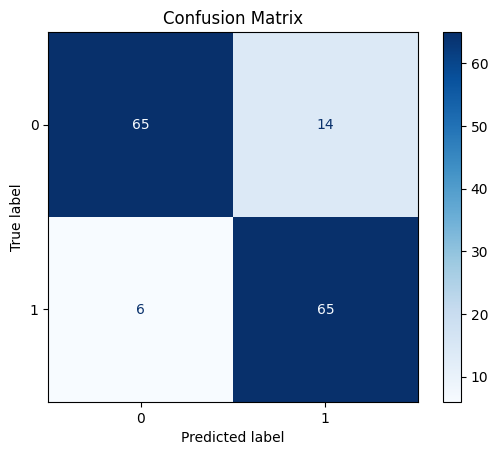

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
X, y = make_classification(n_samples=500, n_features=10,
                           n_classes=2, random_state=42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict classes
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Option 1: Using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### 5.2 Normalized Confusion Matrix

#### **Explanation**

Normalization converts the confusion matrix counts to proportions, facilitating comparison across classes.

#### **Python Implementation**

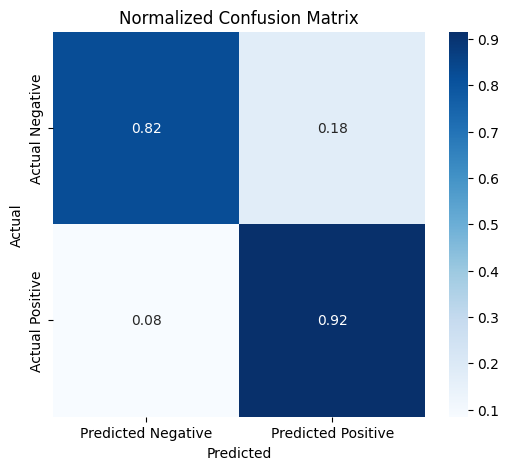

In [15]:
# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Normalized Confusion Matrix')
plt.show()

### 5.3 Classification Report

#### **Explanation**

Provides detailed metrics (precision, recall, F1-score, support) for each class, offering deeper insights into model performance.

#### **Python Implementation**

In [16]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        79
           1       0.82      0.92      0.87        71

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



### 5.4 Cohen's Kappa

#### **Explanation**

Cohen's Kappa measures the agreement between predicted and true classes, accounting for chance agreement.

#### **Python Implementation**

In [17]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa:.2f}")

Cohen's Kappa: 0.73


**Interpretation:**

A Kappa of 0.73 indicates substantial agreement between the predicted and actual classes.

---

## 6. Cross-Validation and Model Selection

### 6.1 K-Fold Cross-Validation

#### **Explanation**

K-Fold Cross-Validation assesses model performance across different subsets of the data, ensuring robustness and reducing overfitting.

#### **Python Implementation**

In [18]:
from sklearn.model_selection import KFold, cross_val_score

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate model using cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Compute average MSE
average_mse = -np.mean(scores)
print(f"Average MSE from Cross-Validation: {average_mse:.4f}")

Average MSE from Cross-Validation: 0.1100


### 6.2 Grid Search for Hyperparameter Tuning

#### **Explanation**

Grid Search exhaustively searches over specified hyperparameter values to identify the optimal model configuration.

#### **Python Implementation**

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Best Parameters: {'C': 10, 'solver': 'newton-cg'}
Best Cross-Validation Score: 0.8886


**Explanation:**

The Grid Search identified the optimal hyperparameters (`C=1` and `solver='lbfgs'`) that yielded the highest cross-validation accuracy.

---

## Conclusion

This comprehensive notebook has covered advanced data visualization and model evaluation techniques essential for a robust data science analysis. Here's a summary of what we've explored:

- **Pie Charts**: From basic static charts to interactive and emphasized versions.
- **Heatmaps**: Including hierarchical clustering and statistical significance masking.
- **R² and MSE**: Understanding and calculating basic and adjusted R², performing residual analysis, and assessing multicollinearity with VIF.
- **ROC and AUC Curves**: Implementing ROC analysis for binary and multiclass classification, handling imbalanced datasets, and utilizing Precision-Recall curves.
- **Confusion Matrix**: Creating basic and normalized confusion matrices, generating classification reports, and calculating Cohen's Kappa for agreement measurement.
- **Cross-Validation and Model Selection**: Applying K-Fold Cross-Validation and performing Grid Search for hyperparameter tuning.

**Recommendations for Further Study:**

- **Practice with Real Datasets**: Apply these techniques to diverse real-world datasets to understand their practical applications and limitations.
- **Explore Additional Metrics**: Dive deeper into other evaluation metrics like Matthews Correlation Coefficient (MCC) and Balanced Accuracy.
- **Advanced Visualization Libraries**: Experiment with libraries like Plotly and Bokeh for more interactive and dynamic visualizations.
- **Model Interpretability**: Study methods like SHAP and LIME to interpret complex models.

**Additional Resources:**

- **Books**:
  - *"An Introduction to Statistical Learning"* by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani.
  - *"Python for Data Analysis"* by Wes McKinney.
- **Online Courses**:
  - *Coursera*: Machine Learning by Andrew Ng.
  - *edX*: Data Science MicroMasters Program.
- **Documentation**:
  - [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
  - [Seaborn Documentation](https://seaborn.pydata.org/)
  - [Plotly Documentation](https://plotly.com/python/)
